# Task 1: Try the algo on Same Whether dataset - LabelEncoding of features: and Train test Division 90%-10%

**Aim: Implement Decsion Tree classifier**


- Implement Decision Tree classifier using scikit learn library
- Test the classifier for Weather dataset

    Step 1: Import necessary libraries.

In [1]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier

    Step 2: Prepare dataset.

In [2]:
#Predictor variables
Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny', 'Overcast',
            'Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast', 'Sunny']
Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool',
                'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal',
            'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High']
Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True',
            'False', 'False', 'False', 'True', 'True', 'False', 'True']

#Class Label:
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No',
'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

    Step 3: Digitize the data set using encoding

In [3]:
#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
Outlook_encoded = le.fit_transform(Outlook)
Outlook_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Outllok mapping:",Outlook_name_mapping)

Temperature_encoded = le.fit_transform(Temperature)
Temperature_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Temperature mapping:",Temperature_name_mapping)

Humidity_encoded = le.fit_transform(Humidity)
Humidity_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Humidity mapping:",Humidity_name_mapping)

Wind_encoded = le.fit_transform(Wind)
Wind_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Wind mapping:",Wind_name_mapping)

Play_encoded = le.fit_transform(Play)
Play_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Play mapping:",Play_name_mapping)

print("\n\n")
print("Weather:" ,Outlook_encoded)
print("Temerature:" ,Temperature_encoded)
print("Humidity:" ,Humidity_encoded)
print("Wind:" ,Wind_encoded)
print("Play:" ,Play_encoded)

Outllok mapping: {'Overcast': 0, 'Rainy': 1, 'Sunny': 2}
Temperature mapping: {'Cool': 0, 'Hot': 1, 'Mild': 2}
Humidity mapping: {'High': 0, 'Normal': 1}
Wind mapping: {'False': 0, 'True': 1}
Play mapping: {'No': 0, 'Yes': 1}



Weather: [1 1 0 2 2 2 0 1 1 2 1 0 0 2]
Temerature: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Humidity: [0 0 0 0 1 1 1 0 1 1 1 0 1 0]
Wind: [0 1 0 0 0 1 1 0 0 0 1 1 0 1]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


    Step 4: Merge different features to prepare dataset

In [4]:
#Combinig weather and Weather, Temerature, Humidity, Wind, Play into single listof tuples
features=tuple(zip(Outlook_encoded,Temperature_encoded,Humidity_encoded,Wind_encoded))
print("Features:",features)

Features: ((1, 1, 0, 0), (1, 1, 0, 1), (0, 1, 0, 0), (2, 2, 0, 0), (2, 0, 1, 0), (2, 0, 1, 1), (0, 0, 1, 1), (1, 2, 0, 0), (1, 0, 1, 0), (2, 2, 1, 0), (1, 2, 1, 1), (0, 2, 0, 1), (0, 1, 1, 0), (2, 2, 0, 1))


    Step 5: Train ’Create and Train DecisionTreeClassifier’

In [5]:
#import the necessary module
from sklearn.model_selection import train_test_split

#split data set into train and test sets
data_train, data_test, target_train, target_test = train_test_split(features,Play_encoded, test_size = 0.10, random_state = 56)

In [6]:
#Create a Decision Tree Classifier (using Entropy)


# Train the model using the training sets
import numpy as np
DecTr = DecisionTreeClassifier()

#Train the model using the training sets
DecTr=DecTr.fit(data_train, target_train)



    Step 6: Predict Output for new data

In [7]:
#Predict Output
#Predict the response for test dataset
target_pred = DecTr.predict(data_test)
print(data_test)
print(target_pred)

[(1, 0, 1, 0), (0, 2, 0, 1)]
[1 1]


In [8]:
#Import confusion_matrix from scikit-learn metrics module for confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(target_test, target_pred)

array([[2]])

In [9]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(target_test, target_pred))

Accuracy: 1.0


In [10]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precision = precision_score(target_test, target_pred)
recall = recall_score(target_test, target_pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

precision: 1.0
recall: 1.0


[Text(148.8, 195.696, 'X[2] <= 0.5\ngini = 0.486\nsamples = 12\nvalue = [5, 7]'),
 Text(74.4, 152.208, 'X[0] <= 0.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(37.2, 108.72, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(111.60000000000001, 108.72, 'X[0] <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(74.4, 65.232, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(148.8, 65.232, 'X[3] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(111.60000000000001, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(186.0, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(223.20000000000002, 152.208, 'X[3] <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(186.0, 108.72, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(260.40000000000003, 108.72, 'X[0] <= 1.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(223.20000000000002, 65.232, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(297.6, 65.232, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

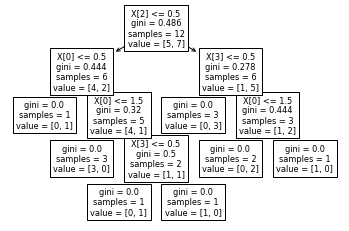

In [11]:
from sklearn import tree
tree.plot_tree(DecTr)

In [12]:
# Q.1
target_pred1 = DecTr.predict([(1,2,1,0)])
print(target_pred1)

[1]


In [13]:
# Q.2
target_pred2 = DecTr.predict([(2,0,0,1)])
print(target_pred2)

[0]
